In [1]:
import cellPLATO as cp

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

OVERWRITE_DATAFRAMES = False

Finished running cellPLATO initialization and loaded config.
Initializing:  ultimate_high_temp_res
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  Z://Collaboration_data/Mace_Lab/my_generated/cellPLATO(dev)/ultimate_high_temp_res\2022-07-21_15-17-36-854020\plots/
Using unique embedding per dataset shortname:  ultimate_high_temp_res
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Using corresponding CTL_SHORTLABEL:  ctl_day1  for condition:  untreated_day1
Dataset in current notebook:  ultimate_high_temp_res
Finished initializing data_processing
Finished intializing visualizations


Finished initializing cellPLATO


In [5]:
if os.path.exists(cp.SAVED_DATA_PATH + 'dr_df.csv'):

    
    comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
    tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
    lab_dr_df


##### Visualize the existing Dimensionaly-Reduced data prior to finetuning the parameters


['ctl_day1' 'ctl_day2' 'cytoD_day1' 'cytoD_day2']


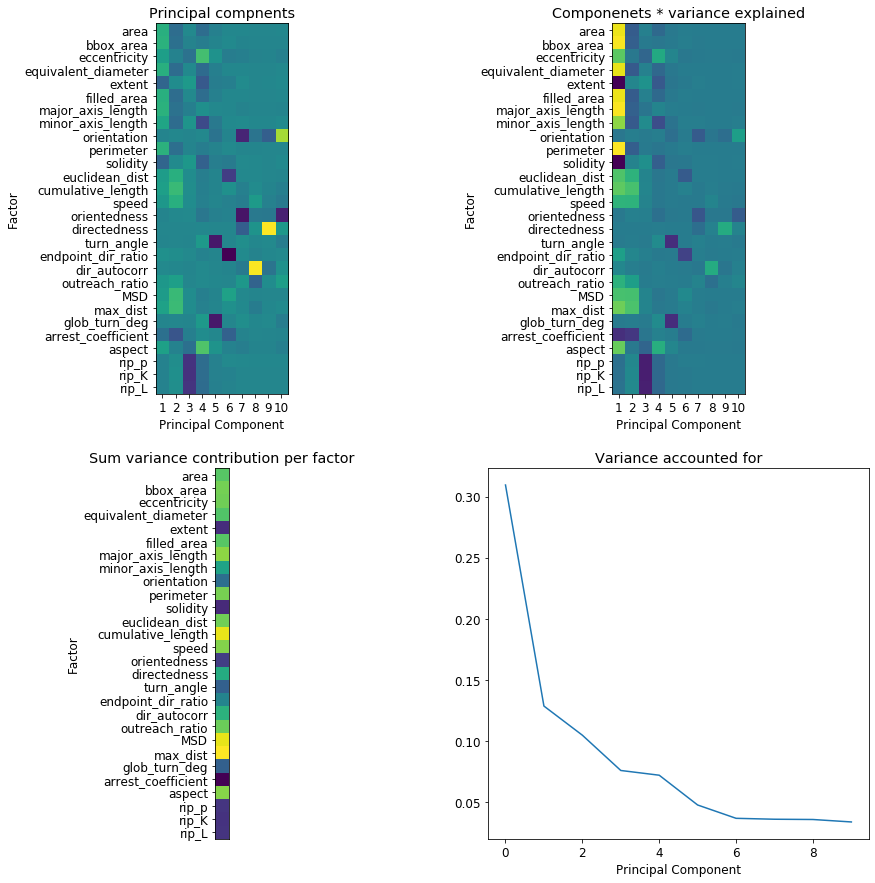

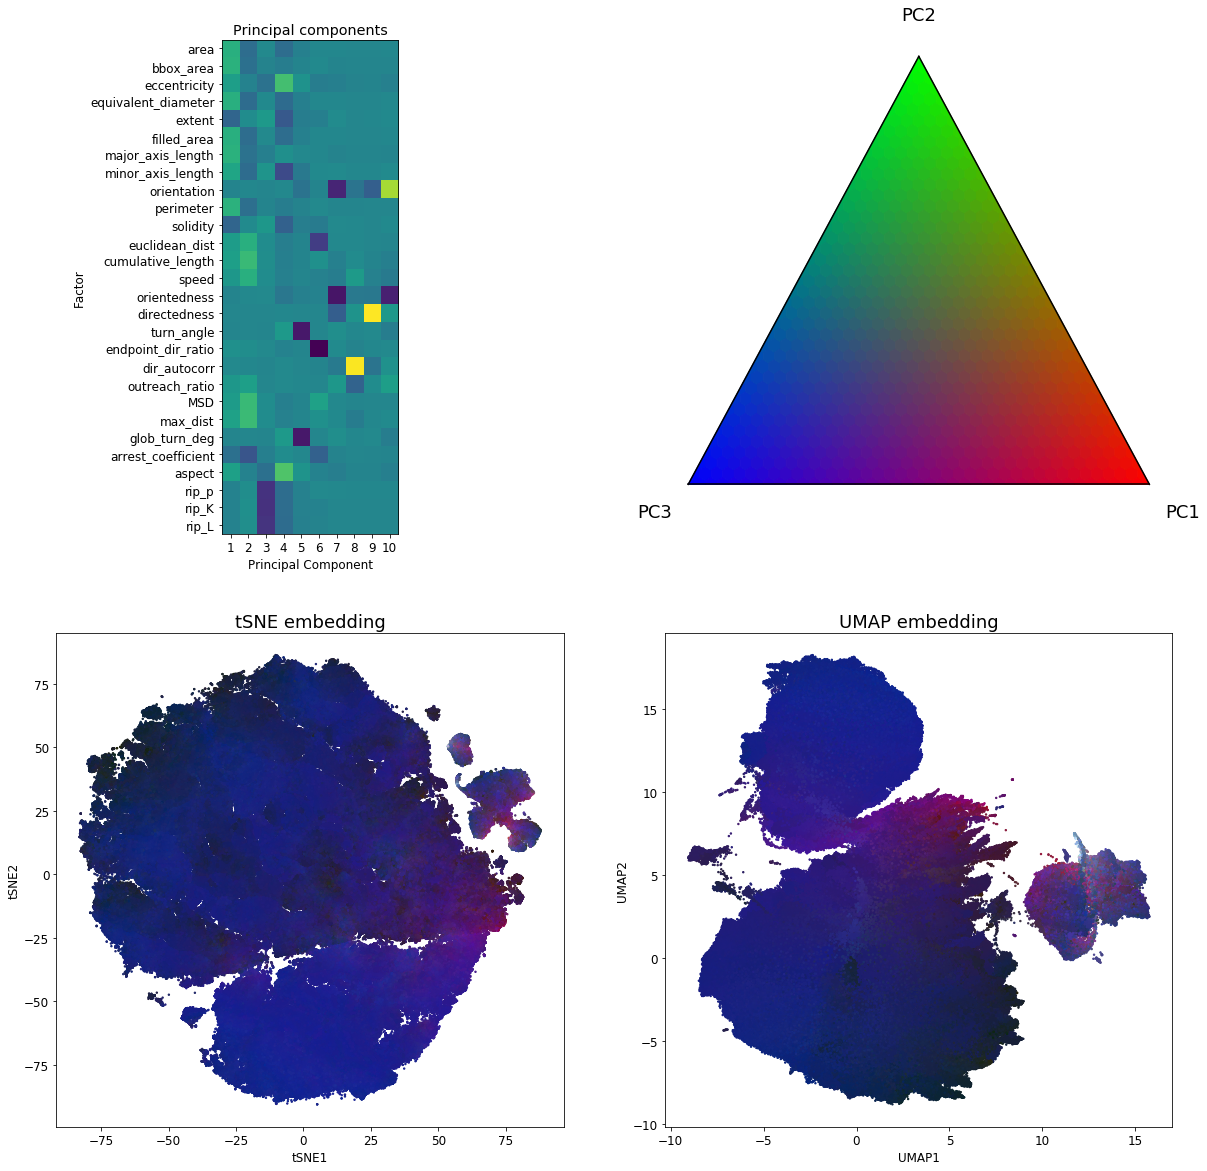

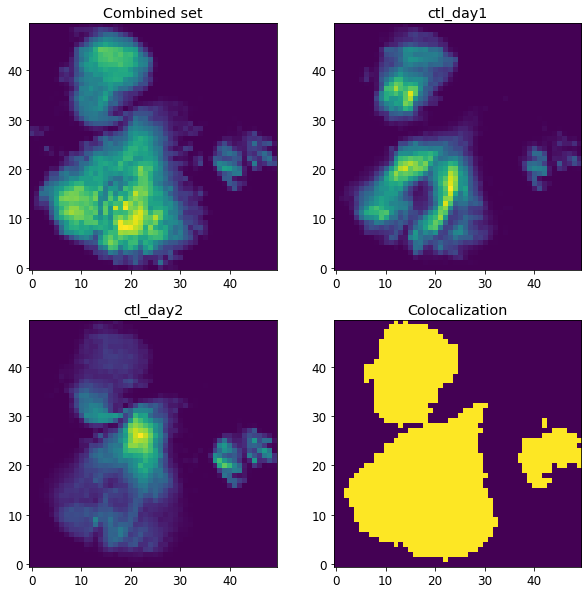

In [3]:
pca_df, components, expl = cp.do_pca(comb_df[cp.DR_FACTORS])
f = cp.pca_factor_vis(dr_df,pca_tuple=[pca_df, components, expl])#cp.DR_FACTORS)
f = cp.dimension_reduction_subplots(dr_df,pca_tuple=[pca_df, components, expl])
f = cp.spatial_img_coloc(dr_df, xy='umap',thresh=10,n_bins=50)

['ctl_day1' 'ctl_day2' 'cytoD_day1' 'cytoD_day2']


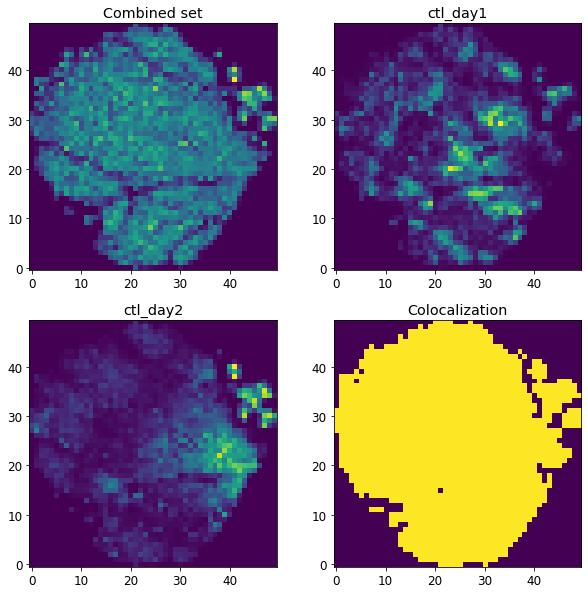

In [4]:
f =cp.spatial_img_coloc(lab_dr_df, xy='tSNE',thresh=2,n_bins=50)

# Filtering upstream of Dimensionality Reduction

Applying filters:
{'area': (0, 10000), 'ntpts': (0, 1000)}
Beginning filtering ...
1117936  data points from  15892  cells
Applying filters to entire cell trajectory:
{'area': (0, 10000), 'ntpts': (0, 1000)}
...
 Finished filtering. Resulting dataframe contains:
534688  data points from  15571  cells


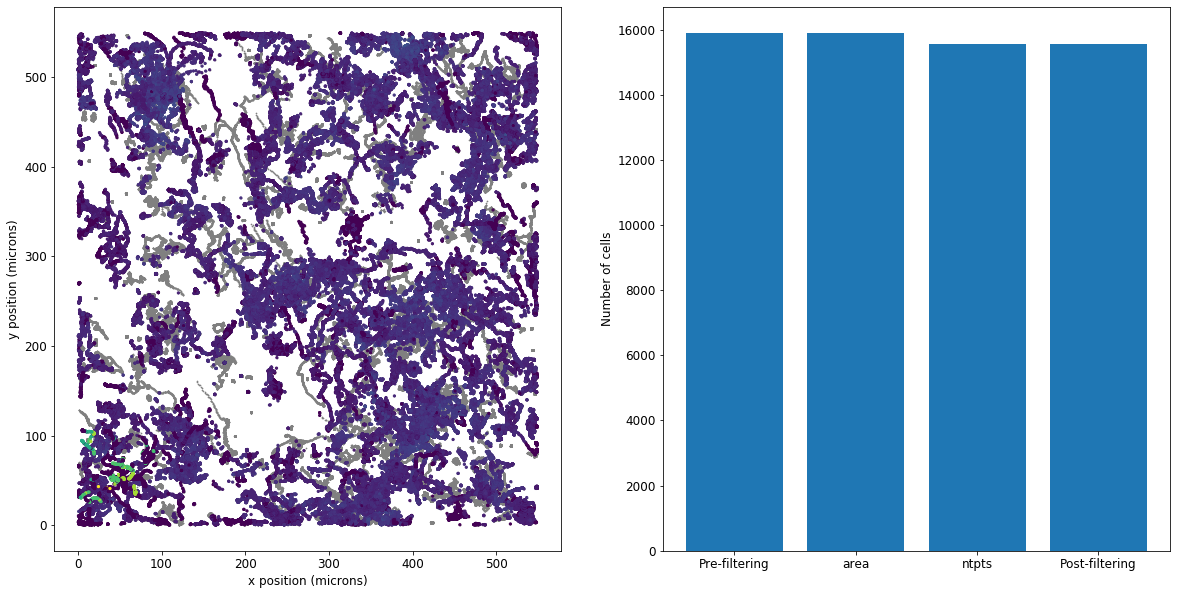

In [5]:
# User-defined filters in dict {factor:(min, max)}
data_filters = {
#   "speed": (10, 100),
  "area": (0, 10000), # Warning: range will change if self-normalized
  "ntpts": (0,1000)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = cp.apply_filters(comb_df,filter_dict=data_filters)

fig = cp.visualize_filtering(comb_df, filt_counts)

In [ ]:
comb_df = filt_df

In [6]:
# Simultaneously sweep a range of critical parameters for tSNE and UMAP embeddings.
cp.sweep_tsne_umap(comb_df, 
                perp_min_max=(10,300), 
                nn_min_max=(2, 100),
                n_vals=3,
                nested_dbscan_sweep=False, 
                dr_factors=cp.DR_FACTORS, 
                eps_vals=None)


---
Running dr_pipeline...
tSNE perplexity =  10.0
UMAP nearest neighbors =  2.0  min distance =  0.5
Using standardized factors for dimensionality reduction, matrix shape:  (1117936, 28)
Using openTSNE with perplexity =  10.0
Using openTSNE to calculate new embedding for input data.


MemoryError: Unable to allocate array with shape (236281, 236281) and data type float64

# Dimensionality Reduction: Parameter sweeping and tuning

In [ ]:
# Now re-do the dimensionality reduction with selected parameters:

# Replace these values with the ones found from the previous sweep
perplexity = cp.TSNE_PERP
umap_nn = cp.UMAP_NN
min_dist = cp.UMAP_MIN_DIST

pca_df, components, expl = cp.do_pca(comb_df[cp.DR_FACTORS])

dr_df = cp.dr_pipeline(comb_df, 
                    dr_factors=cp.DR_FACTORS,
                    tsne_perp=perplexity,
                    umap_nn=umap_nn,
                    min_dist=min_dist) 

f = cp.pca_factor_vis(dr_df,pca_tuple=[pca_df, components, expl])#cp.DR_FACTORS)
f = cp.dimension_reduction_subplots(dr_df,pca_tuple=[pca_df, components, expl])
f = cp.spatial_img_coloc(dr_df, xy='umap',thresh=10,n_bins=50)

##### Visualizat the Migration and Shape characteristic separately in low-dimensional embeddings

Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (1574530, 2)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (1574530, 2)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (1574530, 2)
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by tSNE...
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by tSNE...
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by tSNE...
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by UMAP...
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by UMAP...
hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by UMAP...
Failed to draw cluster, failed to draw cluster:  568  with shape:  (29, 2)
Failed to draw cluster, failed to draw cluster:  1187  with shape:  (28, 2)


<Figure size 720x720 with 0 Axes>

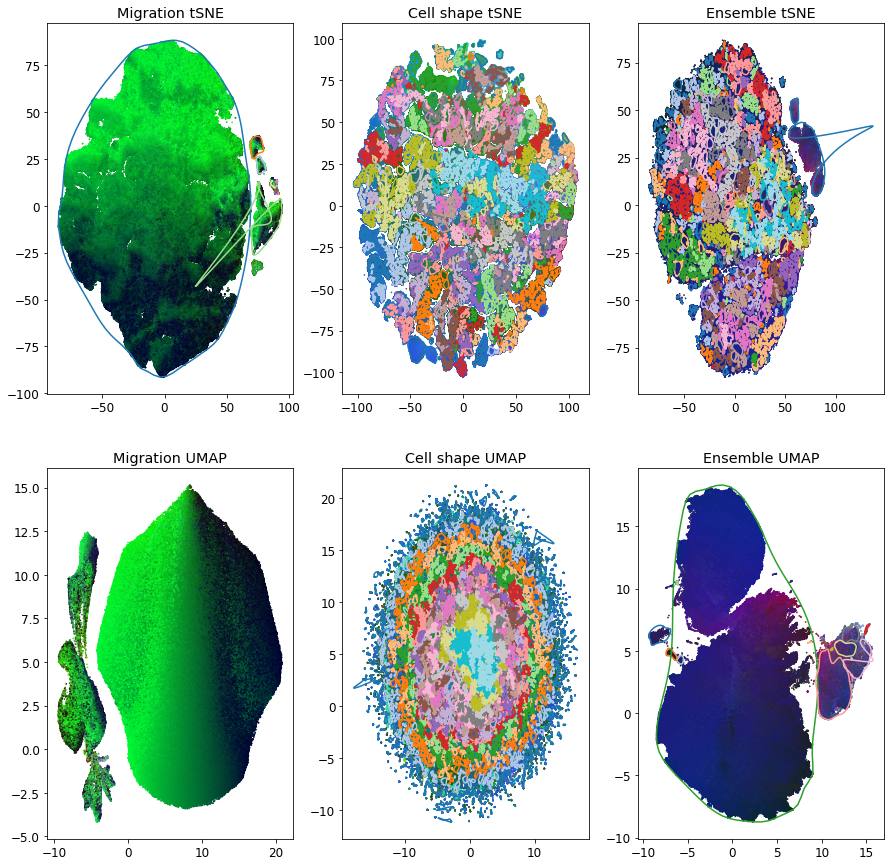

In [6]:
'''
A great improvement will be to colormap by PC values (triangular)
and add make cluster contours for each group.  (hdbscan)
'''

cp.compare_mig_shape_factors(comb_df,
                          dr_factors_mig=cp.MIG_FACTORS,
                          dr_factors_shape=cp.REGIONPROPS_LIST, 
                          dr_factors_all=cp.MIG_FACTORS+cp.REGIONPROPS_LIST+cp.ADDITIONAL_FACTORS
                         )
                       

##### If hdbscan is not performing well on this data, try using DBscan and sweeping eps values

In [ ]:

# Define the range of eps values to sweep across
eps_low = 0.04  # lower value
eps_high = 0.07  # upper value
eps_n = 10   # how many iterations (how many plots to generate)

eps_vals = np.round(np.linspace(eps_low, eps_high, eps_n),3)      

methods = ['umap', 'tsne']

for dr_method in methods:    
    for eps in eps_vals:

        lab_dr_df = cp.dbscan_clustering(dr_df,eps=eps,cluster_by=dr_method, plot=False)
        print('eps: ', eps, ' clusters: ', len(lab_dr_df['label'].unique()))
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[30,10])
        cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='condition',legend=False,ax=ax1,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'condition')
        cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='PCs',ax=ax2,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'pca')
        cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='cluster',ax=ax3,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'cluster')

        fig.show()

        if cp.STATIC_PLOTS:
            plt.savefig(cp.CLUST_PARAMS_DIR+dr_method+'_sweep_eps_'+str(eps)+'nclusters_'+str(len(lab_dr_df['label'].unique()))+'.png', dpi=300)

print('Finished sweeping dbscan clustering. See output directory: ',cp.CLUST_PARAMS_DIR)          
            



In [ ]:
'''
Add here a very clear, intentional step where the lab_dr_df is generated with the
parameters sweeped in the notebook above. 
'''
eps = None
dr_method = 'umap'

if eps is None:
    lab_dr_df = cp.hdbscan_clustering(dr_df,cluster_by=dr_method, plot=False)

else:
        
    lab_dr_df = cp.dbscan_clustering(dr_df,eps=eps,cluster_by=dr_method, plot=False)
# 

### Filtering downstream of dimensionality reduction

##### Example filtering usage (ALL):
    Find cells that maintained a speed between 5-100um/min throughout their trajectory. 

In [ ]:
# Filter after dimensionality reduction
filters = {
#   "tSNE1": (-100, 100), 
#   "tSNE2": (-100, 100), 
#   "area": (200, 600), 
  "speed": (5, 100), 
}

# Apply the post-dimensionality reduction filters and visualize the results.
filt_dr_df, filt_list = cp.apply_filters(lab_dr_df,how='all', filter_dict=filters) # 'all is default behaviour', can be left out. 
fig = cp.visualize_filtering(lab_dr_df, filt_list, plot_by='umap')

In [ ]:
fig = cp.visualize_filtering(lab_dr_df, filt_list)

In [ ]:
# Optional:

# dr_df = filt_dr_df

Example filtering usage (sequential-ANY):¶
- Of those cells, find the ones that had a specific cluster ID at some point in their trajectory. 

In [ ]:
# Filter cells that were a part of clusterid == 5 at some point in their trajectory.
filters = {
  "label": (5, 5) 
}

'''
To apply sequentially, pass the results of the previous filtering operation to apply_filters()
    filt_dr_df
    
To see influence of new 'any' filter in isolation, use lab_dr_df as input.
''' 

filt_dr_df, filt_list = cp.apply_filters(lab_dr_df,how='any', filter_dict=filters) # 'all' is default behaviour
fig = cp.visualize_filtering(lab_dr_df, filt_list, plot_by='umap')

In [ ]:
'''
Optionally, save the results of this fine-tuning to the shared data folder
so the new results can be used by other notebooks.
'''

if OVERWRITE_DATAFRAMES:
    # Save dataframes to shared data folder
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')